In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Data Setup

X: 100 random data points with 3 features each.

y: 100 random binary labels (0 or 1) — the target values.

📌 These are your fake training samples. Like saying:
"Here are 100 people, each described by 3 features. Now guess if they like cats or not."

In [10]:
N_DATAPOINT = 100
N_FEATURES = 3
N_LABELS = 1

X = np.random.randn(N_DATAPOINT, N_FEATURES)
y = np.random.randint(0, 2, size=(N_DATAPOINT, N_LABELS))
#print(X)
#print(y)

# Neural Network Model
This builds a 2-layer feedforward neural network:

**Layer	What It Does**

Linear(3 → 9)	First layer: turns 3 input features into 9 neurons

Sigmoid()	Adds non-linearity (activation)

Linear(9 → 1)	Second layer: reduces to 1 output value

Sigmoid()	Squashes output between 0 and 1 (good for binary classification)

🧮 Why Sigmoid Twice?
First sigmoid adds non-linearity between layers — lets the model learn complex patterns.

Second sigmoid makes the final output a probability between 0 and 1, ideal for predicting class "0" or "1".

📌 Summary
You're building a simple neural network for binary classification.

Data is random, just to test the model structure.

The network:

Takes 3 features,

Has 1 hidden layer with 9 units,

Outputs a probability for classifying 0 or 1.



In [19]:

#        l0_0
# i_0    l0_1
# i_1    l0_2
# i_2    l0_3
#        l0_4


model = torch.nn.Sequential(
    torch.nn.Linear(N_FEATURES, 9),
    torch.nn.Sigmoid(),
    torch.nn.Linear(9, N_LABELS),
    torch.nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=3, out_features=9, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=9, out_features=1, bias=True)
  (3): Sigmoid()
)

## Next code cell
* Loops through all the model’s parameters (weights and biases).
* Filters to get only the first weight matrix (ignores biases).
* Converts the weight tensor to a NumPy array, detaching it from the computation graph.
* Displays the weights as a grayscale image using `matplotlib`.
* Stops after the first weight matrix is visualized.


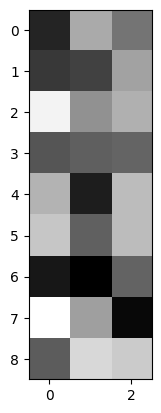

In [23]:
for name, param in model.named_parameters():
    if "weight" in name:
        plt.imshow(param.detach().numpy(), cmap='grey')
        break

Great question! Here's how to **understand this grayscale image of your model's weight matrix**:

---

## 🧠 What You're Seeing

This is a **visual representation of the weights** in the **first layer** of your neural network:

* You defined a layer: `Linear(3, 9)`
  → This means: **3 input features → 9 output neurons**

---

## 🔍 What Each Part Means

* **Each row** (0 to 8) = **one output neuron**
* **Each column** (0 to 2) = **one input feature**

So the value at (row `i`, column `j`) = the **weight connecting input `j` to neuron `i`**.

---

## 🎨 What the Colors Mean

* **White/light shades** = large **positive weights**
* **Black/dark shades** = large **negative weights**
* **Gray** = values closer to **zero**

These weights were **randomly initialized**, so this shows the "starting point" of your model before training.

---

## 📌 Summary

* 9 neurons × 3 input features = 9×3 weight matrix.
* This image **shows how strongly each input connects to each neuron**.
* You'll see it change as the model **trains and learns patterns**.

Let me know if you want to visualize how it evolves during training!
